# Árbol de decisión para especies de flores

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [7]:
data = pd.read_csv("../datasets/iris/iris.csv")

In [8]:
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
data.shape

(150, 5)

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

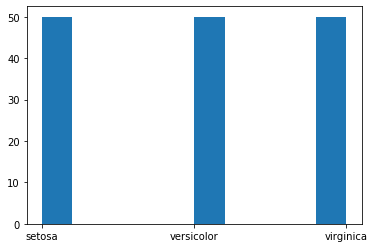

In [10]:
plt.hist(data.Species)

In [11]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [12]:
colnames = data.columns.values.tolist()
predictors = colnames[:4]
target = colnames[4]

In [13]:
import numpy as np

In [14]:
data["is_train"] = np.random.uniform(0, 1, len(data)) <=0.75
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True


<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

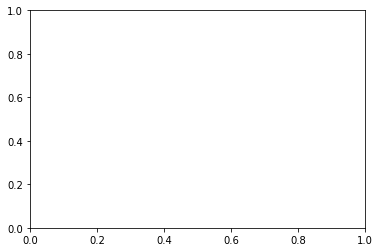

In [15]:
plt.hist(data["is_train"])

In [16]:
train, test = data[data["is_train"]==True], data[data["is_train"]==False]

In [17]:
len(train),len(test),len(train)+len(test),1/(150-len(train))

(108, 42, 150, 0.023809523809523808)

In [18]:
from sklearn.tree import DecisionTreeClassifier

### Hacemos la función de árbol de decisión

In [19]:
tree = DecisionTreeClassifier(criterion="entropy", min_samples_split=20, random_state=99)
tree.fit(train[predictors], train[target])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=99, splitter='best')

In [20]:
preds = tree.predict(test[predictors])

In [21]:
pd.crosstab(test[target], preds, rownames=["Actual"], colnames=["Predictions"])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,14,0,0
versicolor,0,13,1
virginica,0,2,12


## Visualización del Árbol de Decisión

In [22]:
from sklearn.tree import export_graphviz

### Primero creamos un fichero .dot con la siguiente Función 
Usamos la siguiente función, con "w" para especificar que vamos a escribir (crear la imagen)

In [23]:
with open("../notebooks/resources/iris_dtree.dot", "w") as dotfile:
    export_graphviz(tree, out_file=dotfile, feature_names= predictors)
    dotfile.close()

In [24]:
import os
from graphviz import Source

ModuleNotFoundError: No module named 'graphviz'

Ahora, abrimos el archivo sólo para lectura "r".
* Leemos el texto del archivo que generó
* Lo abrimos con la función Source(...)

In [25]:
file = open("../notebooks/resources/iris_dtree.dot", "r")
text = file.read()

#### MUY IMPORTANTE INSTALAR EL GRAPHVIZ Y AÑADIR ESTA RUTA (DE LA CARPETA DONDE QUEDÓ)

In [26]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [27]:
Source(text)

NameError: name 'Source' is not defined

## Cross-Validation para la poda

In [28]:
X = data[predictors]
Y = data[target]

In [29]:
tree2 = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=20, random_state=99)
tree2.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=99, splitter='best')

In [30]:
from sklearn.model_selection import KFold

In [31]:
cv = KFold(n_splits=10, shuffle=True, random_state=1)

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
scores = cross_val_score(tree, X, Y, scoring="accuracy", cv = cv) 
scores

array([1.        , 0.93333333, 0.93333333, 0.93333333, 1.        ,
       0.93333333, 1.        , 0.86666667, 0.93333333, 0.8       ])

In [34]:
score = np.mean(scores)
score

0.9333333333333333

Hagamos un ensayo modificando los valores de profundidad del árbol

In [35]:
 for i in range(1,11):
        tree3 = DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_split=20, random_state=99)
        tree3.fit(X,Y)
        cv = KFold(n_splits=10, shuffle=True, random_state=1)
        scores = cross_val_score(tree3, X, Y, scoring="accuracy", cv = cv) 
        score = np.mean(scores)
        print("Score para i = %d" %i, " es de: ", score)
        print("     ",tree3.feature_importances_)
print(predictors)

Score para i = 1  es de:  0.5666666666666667
      [0. 0. 1. 0.]
Score para i = 2  es de:  0.9200000000000002
      [0.         0.         0.66620285 0.33379715]
Score para i = 3  es de:  0.9400000000000001
      [0.         0.         0.68976981 0.31023019]
Score para i = 4  es de:  0.9333333333333333
      [0.         0.         0.66869158 0.33130842]
Score para i = 5  es de:  0.9333333333333333
      [0.         0.         0.66869158 0.33130842]
Score para i = 6  es de:  0.9333333333333333
      [0.         0.         0.66869158 0.33130842]
Score para i = 7  es de:  0.9333333333333333
      [0.         0.         0.66869158 0.33130842]
Score para i = 8  es de:  0.9333333333333333
      [0.         0.         0.66869158 0.33130842]
Score para i = 9  es de:  0.9333333333333333
      [0.         0.         0.66869158 0.33130842]
Score para i = 10  es de:  0.9333333333333333
      [0.         0.         0.66869158 0.33130842]
['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width'

Esto implica que el valor más óptimo de niveles es de 3. 
Siendo ramas mayores a 4 innecesarias

## Random Forests para Decision Trees

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
forest = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=100)

In [42]:
forest.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [43]:
forest.oob_decision_function_

array([[1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.97058824, 0.02941176, 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.

In [44]:
forest.oob_score_

0.9466666666666667